In [21]:
import pandas
import configparser
import psycopg2

In [22]:
config = configparser.ConfigParser ()
config.read('config.ini')
db = config['myaws']['db']
host = config['myaws']['host']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [23]:
conn = psycopg2.connect (
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

In [6]:
sql = """ select avg(price) as avg_price, built_in
        from house_price_full
        group by built_in
        order by built_in asc """

/tmp/ipykernel_7701/2924564057.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query (sql , conn)


<Axes: xlabel='built_in'>

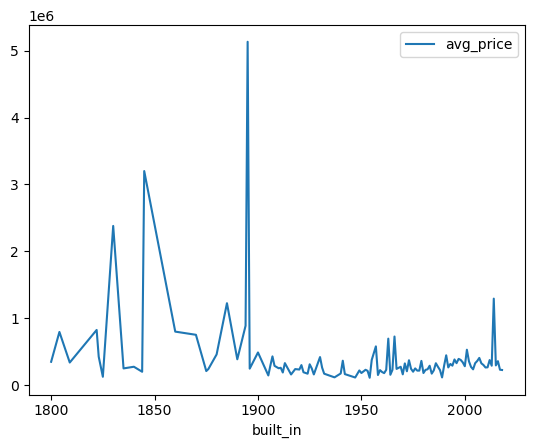

In [8]:
df = pandas.read_sql_query (sql , conn)
df.plot(x='built_in',y='avg_price')

In [12]:
sql = """ select price, area
        from house_price_full
         """

/tmp/ipykernel_7701/3387204968.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pandas.read_sql_query(sql, conn)


<Axes: xlabel='area', ylabel='price'>

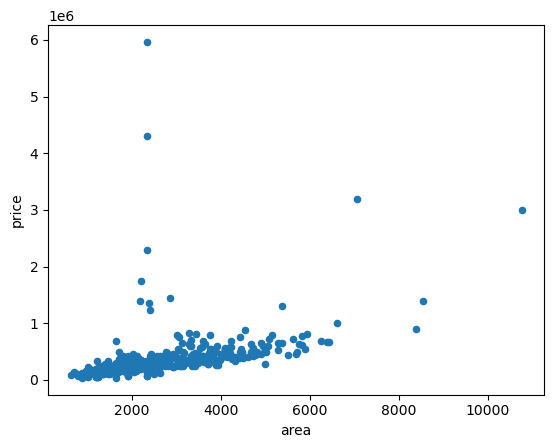

In [13]:
df =pandas.read_sql_query(sql, conn)
df.plot.scatter (x='area', y='price')

In [14]:
sql = """ select price, house_type
        from house_price_full
         """

In [15]:
df =pandas.read_sql_query(sql, conn)
df.groupby ('house_type').mean()

/tmp/ipykernel_7701/2632764662.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pandas.read_sql_query(sql, conn)


,price
house_type,
condo,199983.017094
lot or land,218640.549654
multi-family,272433.333333
single-family home,340267.734127
townhouse,219029.659091


In [19]:
sql= """ select avg(price) as avg_price, house_type 
from house_price_full
group by house_type"""

In [20]:
df =pandas.read_sql_query(sql, conn)
df [:]

/tmp/ipykernel_7701/4106625277.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pandas.read_sql_query(sql, conn)


,avg_price,house_type
0,2.186405e+05,lot or land
1,1.999830e+05,condo
2,2.002999e+06,None
3,2.724333e+05,multi-family
4,3.402677e+05,single-family home
5,2.190297e+05,townhouse


In [25]:
sql="""select * from student"""

In [26]:
df =pandas.read_sql_query(sql, conn)
df [:]

/tmp/ipykernel_7701/4106625277.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [27]:
cur= conn.cursor()

In [31]:
sql="""insert into student(s_email, s_name, major)
        values('{}','{}','{}')""".format('s5@jmu.edu','s3','IA')
print(sql)

insert into student(s_email, s_name, major)
        values('s5@jmu.edu','s3','IA')


In [32]:
cur.execute(sql)

In [33]:
conn.commit()

In [35]:
cur.close()

In [36]:
conn.close()